In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
df = pd.read_csv('../data/raw/bank-dataset.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,married,tertiary,no,2143,yes,no,unknown,5,may,261.0,1,-1,0,unknown,no
1,44.0,technician,single,secondary,no,29,yes,no,unknown,5,may,151.0,1,-1,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76.0,1,-1,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92.0,1,-1,0,unknown,no
4,33.0,unknown,single,unknown,no,1,no,no,unknown,5,may,198.0,1,-1,0,unknown,no


In [89]:
len(df)

43097

<html>
<h1 style="text-align:left;color:red;font-size:200%">Table of Contents : </h1>
</html>

  1. [Preprocessing](#sec1)
  2. [Manage Missing](#sec2)
  3. [Encoding](#sec3)
  4. [Apply Logarithm](#sec4)
  5. [Split dataset](#sec5)
  6. [Feature Scaling](#sec6)
  7. [Undersampling](#sec7)

## 1. Preprocessing <a class="anchor" id="sec1"></a>

* Eliminare duplicati
* Eliminare persone che hanno 150 anni
* Eliminare persone in pensione con meno di 50 anni
* creare una variabile categorica pdays pari a 1 se il cliente è stato contattato in precedenza, 0 altrimenti (se pdays=-1)
* creare una variabile categorica basata sui valori numerici di previous
* correggere marital
* gestire i missing

In [90]:
df = df.drop_duplicates()

In [91]:
# Eliminare persone che hanno 150 anni

df = df[df.age!=150]

In [92]:
df.describe([x*0.1 for x in range(10)])

,age,balance,day,duration,campaign,pdays,previous
count,42909.000000,42932.000000,42932.000000,42856.000000,42932.000000,42932.000000,42932.000000
mean,40.902561,1341.531119,15.860570,244.551615,2.798821,38.715667,0.549264
std,10.343413,2992.180951,8.428862,240.115177,3.147805,98.728388,2.281145
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
0%,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
10%,29.000000,0.000000,5.000000,57.000000,1.000000,-1.000000,0.000000
20%,32.000000,19.000000,7.000000,87.000000,1.000000,-1.000000,0.000000
30%,34.000000,124.000000,10.000000,114.000000,1.000000,-1.000000,0.000000
40%,36.000000,263.000000,13.000000,142.000000,2.000000,-1.000000,0.000000
50%,39.000000,437.000000,16.000000,174.000000,2.000000,-1.000000,0.000000


In [93]:
# Eliminare persone in pensione con meno di 50 anni
print(len(df))
drop_idx = df[(df.job=='retired')&(df.age<50)].index.to_list()
df = df[~(df.index.isin(drop_idx))]
print(len(df))

42932
42798


In [94]:
df[df.job=='retired'].age.describe([x*0.1 for x in range(10)])

count    1875.000000
mean       61.901333
std         7.993686
min        50.000000
0%         50.000000
10%        54.000000
20%        56.000000
30%        57.000000
40%        58.000000
50%        59.000000
60%        60.000000
70%        63.000000
80%        69.000000
90%        75.000000
max        95.000000
Name: age, dtype: float64

In [95]:
# Eliminare persone che hanno 150 anni e hanno un lavoro diverso da 'retired' o 'unknown'

# drop_idx = df[(df['age']==150)&(df['job'].isin(['management', 'technician', 'entrepreneur', 'blue-collar',
#         'admin.', 'services', 'self-employed',
#        'unemployed', 'housemaid', 'student']))].index.to_list()
# print(len(drop_idx))
# df = df[~(df.index.isin(drop_idx))]
# print(df[df.age>100].job.unique())
# print(len(df))

In [96]:
# creare una variabile categorica pdays pari a 1 se il cliente è stato contattato in precedenza, 0 altrimenti (se pdays=-1)
df['pdays_cat'] = df['pdays'].apply(lambda x: 1 if x!=-1 else 0)
df['pdays_cat'].value_counts()
# valorizzare pdays pari a 0 quando ha -1
df.pdays[df.pdays<0]=0

In [97]:
df.previous.value_counts()[:5]

previous
0    35356
1     2522
2     1904
3     1027
4      642
Name: count, dtype: int64

In [98]:
df[df.previous>0].previous.describe()

count    7442.000000
mean        3.164472
std         4.661974
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max       275.000000
Name: previous, dtype: float64

In [99]:
# creare una variabile categorica basata sui valori numerici di previous
df.rename(columns={'previous':'previous_num'},inplace=True)
previous_q75 = df.previous_num[df.previous_num>0].quantile(0.75) #4
previous_max =df.previous_num[df.previous_num>0].max() #275
#df['previous'] = pd.cut(df['previous_num'],bins=[-0.001,0,previous_q75,previous_max+1])
df['previous'] = pd.cut(df['previous_num'],bins=[-0.001,0,previous_q75+1,previous_max+1],labels=[0,1,2])
df.drop(['previous_num'],axis=1,inplace=True)
df['previous'].value_counts()

previous
0    35356
1     6512
2      930
Name: count, dtype: int64

In [100]:
#correggere marital
diz_marital = {'singl':'single','divrcd':'divorced'}
df['marital'] = df['marital'].map(lambda x: x.lower() if x.lower() not in diz_marital.keys() else diz_marital[x.lower()])
print(len(df[df.marital=='s'])/len(df)*100)
df = df[df.marital!='s']
print(len(df))

0.09112575353988504
42759


## 2. Manage Missings <a class="anchor" id="sec2"></a>

Ci sono missing nelle seguenti variabili:
* 0.05% in age --> fillata con la mediana dell'età
* 0.13% in contact e il 30% è unknown -->la elimino perché non influisce sulla variabile target
* 0.17% in duration --> elimino duration perché influisce molto sulla variabile target. Se duration=0, y=0
* 0.023% in poutcome --> elimino poutcome perchè più dell'80% è non conosciuto

In [101]:
df.isnull().sum()/len(df)*100

age          0.053790
job          0.000000
marital      0.000000
education    0.000000
default      0.000000
balance      0.000000
housing      0.000000
loan         0.000000
contact      0.135644
day          0.000000
month        0.000000
duration     0.175402
campaign     0.000000
pdays        0.000000
poutcome     0.023387
y            0.000000
pdays_cat    0.000000
previous     0.000000
dtype: float64

In [102]:
df.age.describe()

count    42736.000000
mean        40.899242
std         10.355685
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [103]:
# valorizzare i missing di age con la mediana dell'età
df['age'].fillna(df['age'].median(),inplace=True)

In [104]:
df[df.education=='unknown']['education']

3        unknown
4        unknown
13       unknown
16       unknown
42       unknown
          ...   
43028    unknown
43039    unknown
43047    unknown
43055    unknown
43078    unknown
Name: education, Length: 1731, dtype: object

In [105]:
# eliminare la modalità unknown da job
df = df[df.job!='unknown']

In [106]:
# valorizzare unknown di education con la moda per tipo di lavoro 
diz_job_ed =  df[df.education!='unknown'].groupby('job')['education'].agg(pd.Series.mode).to_dict()
print(diz_job_ed)
print(df.education.value_counts())
df.education[df.education=='unknown'] = df[df.education=='unknown']['job'].apply(lambda x: diz_job_ed[x])
print(df.education.value_counts())

{'admin.': 'secondary', 'blue-collar': 'secondary', 'entrepreneur': 'tertiary', 'housemaid': 'primary', 'management': 'tertiary', 'retired': 'secondary', 'self-employed': 'tertiary', 'services': 'secondary', 'student': 'secondary', 'technician': 'secondary', 'unemployed': 'secondary'}
education
secondary    21989
tertiary     12421
primary       6462
unknown       1610
Name: count, dtype: int64
education
secondary    23221
tertiary     12755
primary       6506
Name: count, dtype: int64


In [107]:
# valorizzare i missing di contact come unknown
# df.contact[df.contact.isnull()]='unknown'
# print(df.contact.value_counts())
# print(df.contact.isnull().sum())

In [108]:
# elimino duration e poutcome
df.drop(['duration','day','poutcome','contact'],axis=1,inplace=True)

## 3. Encoding <a class="anchor" id="sec3"></a>

* job, marital, poutcome,contact are **non-ordered categorical variables** --> One-hot encoding
* default, housing,loan and y are **binary** --> Ordinal Labeling
* month, day and education are **ordered variables** --> Ordinal Labeling

In [109]:
categ_features = df.columns[df.dtypes=='object'].to_list() 
categ_features

['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'y']

In [110]:
for c in categ_features:
    print('Unique values of {}: \n'.format(c))
    print(df[c].value_counts(normalize=True))

Unique values of job: 

job
blue-collar      0.221812
management       0.210113
technician       0.170355
admin.           0.115602
services         0.093451
retired          0.044654
self-employed    0.035521
entrepreneur     0.033661
unemployed       0.028436
housemaid        0.028035
student          0.018361
Name: proportion, dtype: float64
Unique values of marital: 

marital
married     0.606939
single      0.277106
divorced    0.115955
Name: proportion, dtype: float64
Unique values of education: 

education
secondary    0.546608
tertiary     0.300245
primary      0.153147
Name: proportion, dtype: float64
Unique values of default: 

default
no     0.98131
yes    0.01869
Name: proportion, dtype: float64
Unique values of housing: 

housing
yes    0.569112
no     0.430888
Name: proportion, dtype: float64
Unique values of loan: 

loan
no     0.83506
yes    0.16494
Name: proportion, dtype: float64
Unique values of month: 

month
may    0.311167
jul    0.154913
aug    0.139094
jun    0.

In [111]:
diz_month = {'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
df['month'] = df['month'].map(lambda x: diz_month[x])

In [112]:
diz_ed = {'primary':1,'secondary':2,'tertiary':3,'unknown':0}
df['education'] = df['education'].map(lambda x: diz_ed[x] if x in diz_ed.keys() else x)

In [113]:
l_binary = ['default','housing','loan','y']
for c in l_binary:
        df[c] = df[c].apply(lambda x: 1 if x=='yes' else 0)

In [114]:
for c in categ_features:
    print('Unique values of {}: \n'.format(c))
    print(df[c].value_counts(normalize=True))

Unique values of job: 

job
blue-collar      0.221812
management       0.210113
technician       0.170355
admin.           0.115602
services         0.093451
retired          0.044654
self-employed    0.035521
entrepreneur     0.033661
unemployed       0.028436
housemaid        0.028035
student          0.018361
Name: proportion, dtype: float64
Unique values of marital: 

marital
married     0.606939
single      0.277106
divorced    0.115955
Name: proportion, dtype: float64
Unique values of education: 

education
2    0.546608
3    0.300245
1    0.153147
Name: proportion, dtype: float64
Unique values of default: 

default
0    0.98131
1    0.01869
Name: proportion, dtype: float64
Unique values of housing: 

housing
1    0.569112
0    0.430888
Name: proportion, dtype: float64
Unique values of loan: 

loan
0    0.83506
1    0.16494
Name: proportion, dtype: float64
Unique values of month: 

month
5     0.311167
7     0.154913
8     0.139094
6     0.116920
11    0.089214
4     0.063086
2  

### One-hot encoding 

In [115]:
from sklearn.preprocessing import OneHotEncoder

cols_to_encode = ['job', 'marital']

# Step 1: Extract the columns to be encoded
data_to_encode = df[cols_to_encode]

# Step 2: Create an instance of the OneHotEncoder
encoder = OneHotEncoder(dtype='int')

# Step 3: Fit and transform the data using the encoder
encoded_data = encoder.fit_transform(data_to_encode)

In [116]:
dummy_variables = encoder.get_feature_names_out(cols_to_encode)
dummy_variables

array(['job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single'], dtype=object)

In [117]:
# Step 4: Convert the encoded data to a DataFrame
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(cols_to_encode))

# Step 5: Concatenate the encoded DataFrame with the remaining columns from the original DataFrame
final_df = pd.concat([df.drop(cols_to_encode, axis=1), encoded_df], axis=1)

In [118]:
final_df.isnull().sum()

age                  599
education            599
default              599
balance              599
housing              599
loan                 599
month                599
campaign             599
pdays                599
y                    599
pdays_cat            599
previous             599
job_admin.           599
job_blue-collar      599
job_entrepreneur     599
job_housemaid        599
job_management       599
job_retired          599
job_self-employed    599
job_services         599
job_student          599
job_technician       599
job_unemployed       599
marital_divorced     599
marital_married      599
marital_single       599
dtype: int64

In [119]:
final_df = final_df[final_df.age.notnull()]

In [120]:
final_df = final_df[final_df.job_retired.notnull()]

In [121]:
final_df.head()

,age,education,default,balance,housing,loan,month,campaign,pdays,y,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single
0,58.0,3.0,0.0,2143.0,1.0,0.0,5.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,44.0,2.0,0.0,29.0,1.0,0.0,5.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,33.0,2.0,0.0,2.0,1.0,1.0,5.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,47.0,2.0,0.0,1506.0,1.0,0.0,5.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,35.0,3.0,0.0,231.0,1.0,0.0,5.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [122]:
numeric_features = ['age', 'balance', 'campaign', 'pdays']

## 4. Apply Logarithm <a class="anchor" id="sec4"></a>

* C'è molta variabilità nelle variabili e ci sono molti outlier con valori alti
* Quindi, restringo il range di queste variabili applicando il logaritmo

In [123]:
# apply transformation to numerical features
l_cols_transform = ['balance', 'campaign', 'pdays']
for c in l_cols_transform:
    df[c] = np.log(df[c])

/home/eugenia/fastweb/venv/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/eugenia/fastweb/venv/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## 5. Split dataset <a class="anchor" id="sec5"></a>

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
X = final_df.drop(['y'],axis=1)
y = final_df['y']

In [126]:
train_idx, test_idx,y_train,_ = train_test_split(X.index,y,test_size=0.2,stratify=y,random_state=123)

In [127]:
set(train_idx).intersection(set(test_idx))

set()

In [128]:
len(train_idx),len(test_idx)

(33506, 8377)

In [129]:
train_idx, val_idx,_,_ = train_test_split(train_idx,y_train,test_size=0.2,stratify=y_train,random_state=123)

In [130]:
set(train_idx).intersection(set(val_idx))

set()

In [131]:
len(train_idx),len(val_idx)

(26804, 6702)

In [132]:
df_train = final_df[final_df.index.isin(train_idx)]
df_test = final_df[final_df.index.isin(test_idx)]
df_val = final_df[final_df.index.isin(val_idx)]

## 6. Feature Scaling <a class="anchor" id="sec6"></a>

* C'è molta variabilità nelle variabili e ci sono molti outlier con valori alti
* Quindi, restringo il range di queste variabili applicando il logaritmo

In [133]:
# l_cols_transform = ['balance', 'campaign', 'pdays']
# for c in l_cols_transform:
#     df_train[c] = np.log(df_train[c])

In [134]:
# from sklearn.preprocessing import RobustScaler
# sc=RobustScaler()
# df_train[numeric_features]=sc.fit_transform(df_train[numeric_features])
# df_test[numeric_features]=sc.transform(df_test[numeric_features])
# df_val[numeric_features]=sc.transform(df_val[numeric_features])

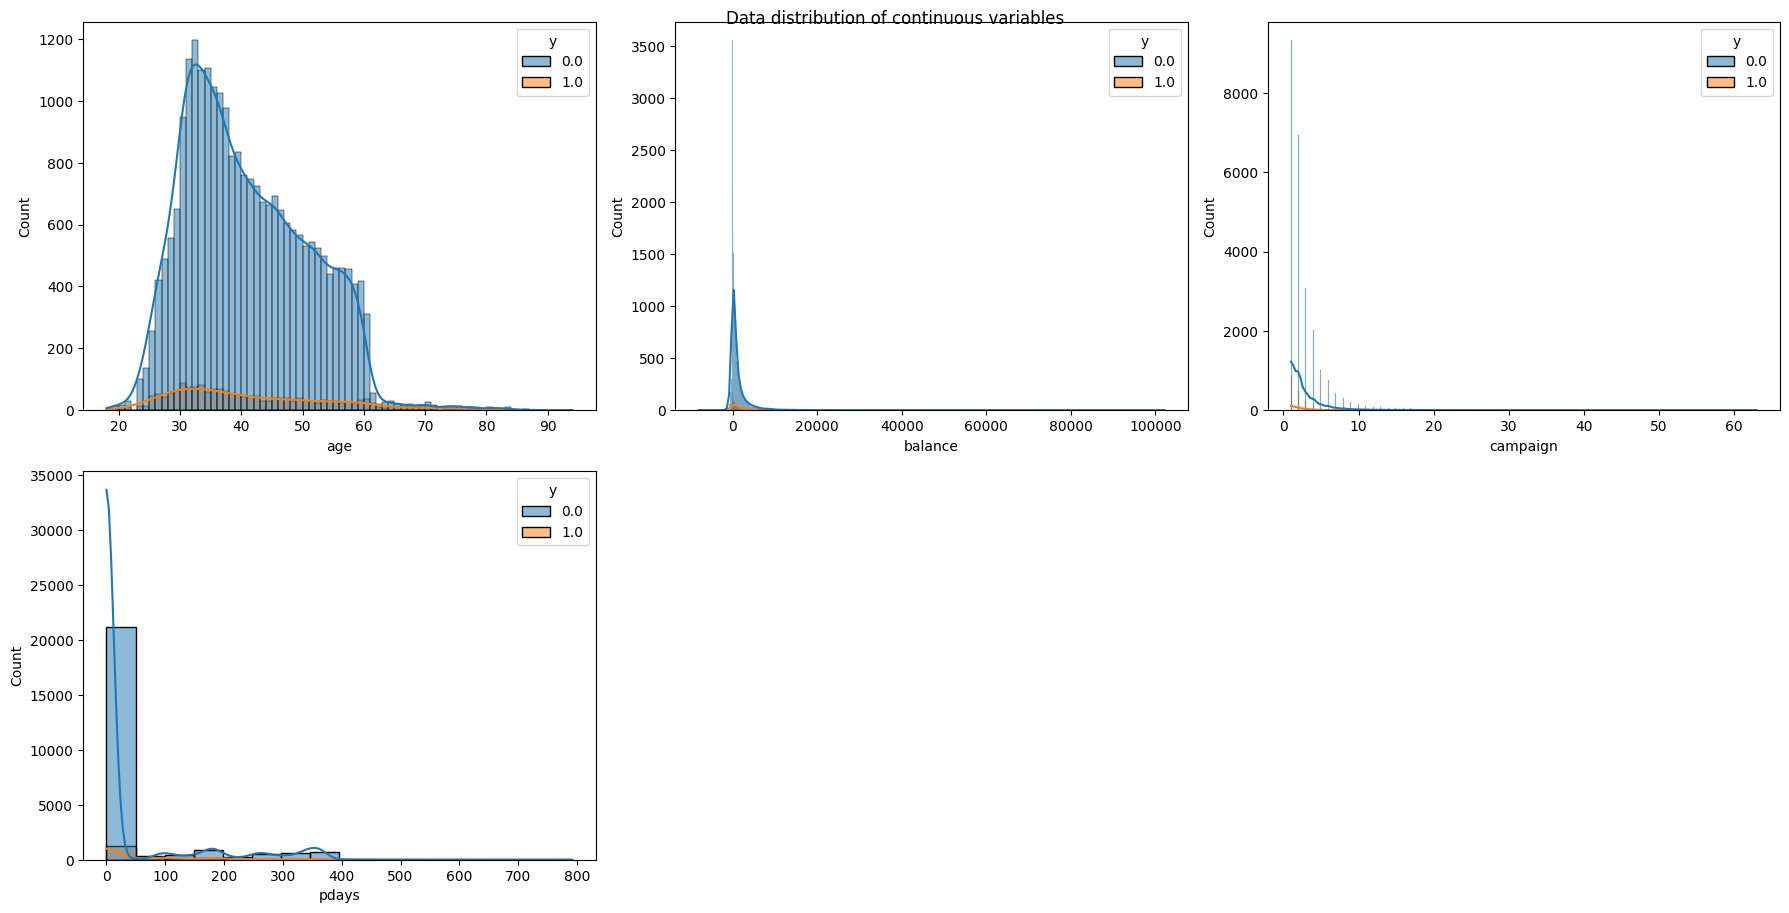

In [135]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(numeric_features):
    ax = plt.subplot(4,3, i+1)
    sns.histplot(data=df_train, x=col, ax=ax,color='blue',kde=True,hue='y')
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

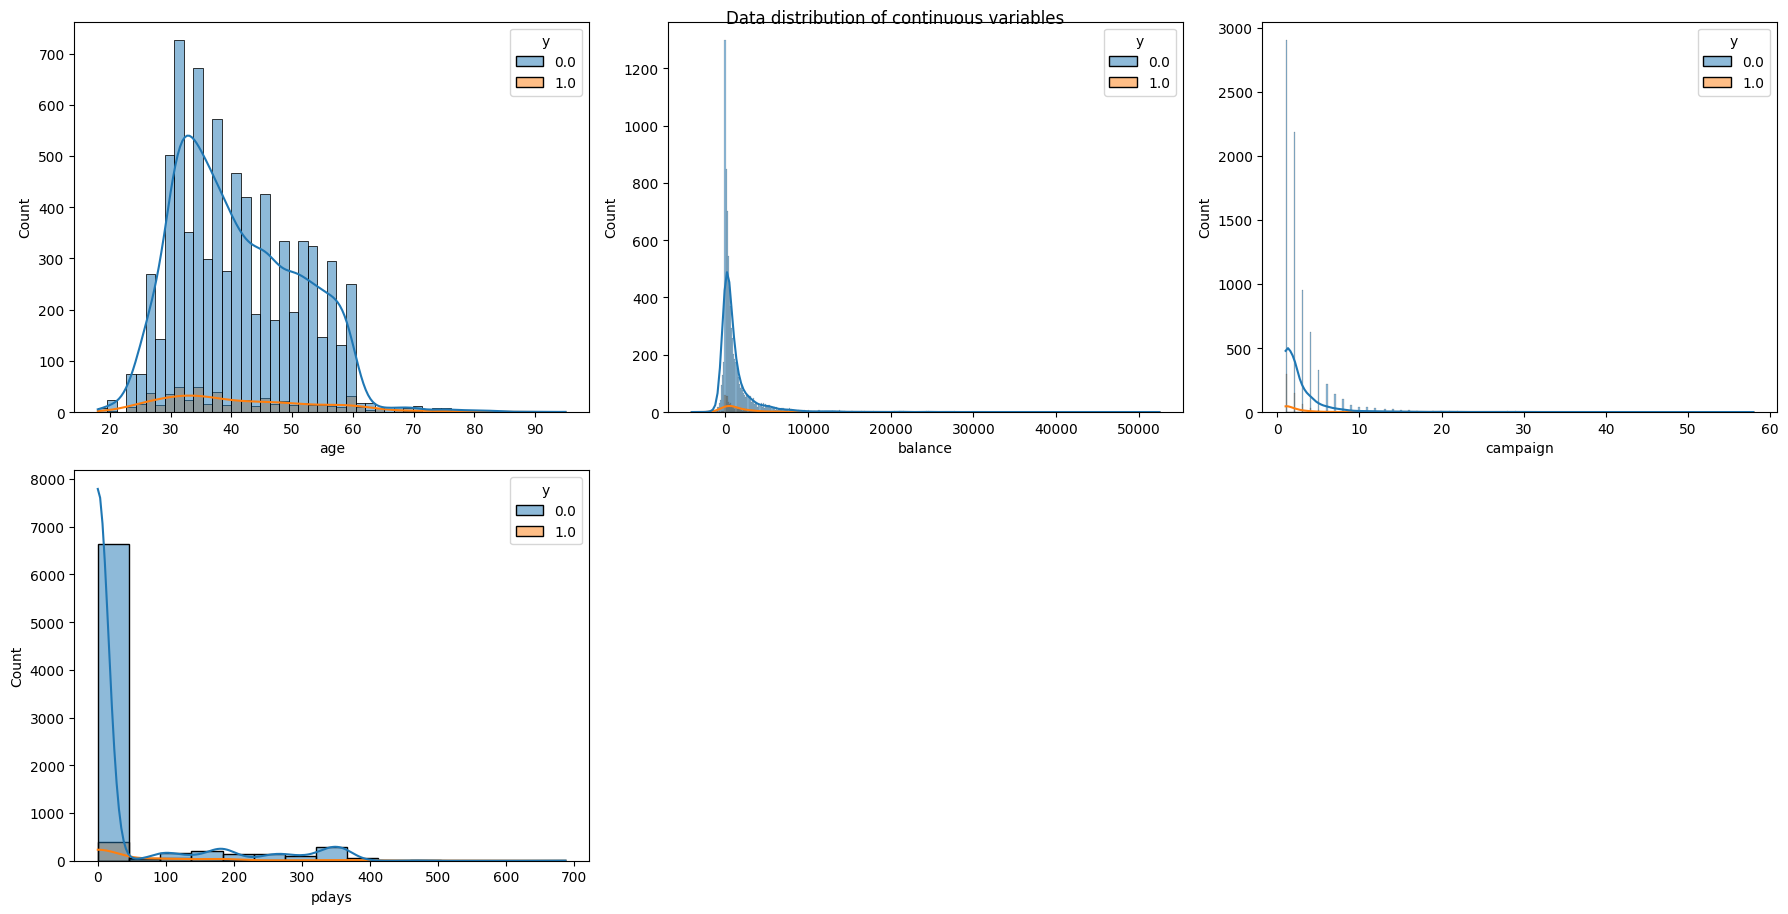

In [136]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(numeric_features):
    ax = plt.subplot(4,3, i+1)
    sns.histplot(data=df_test, x=col, ax=ax,color='blue',kde=True,hue='y')
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

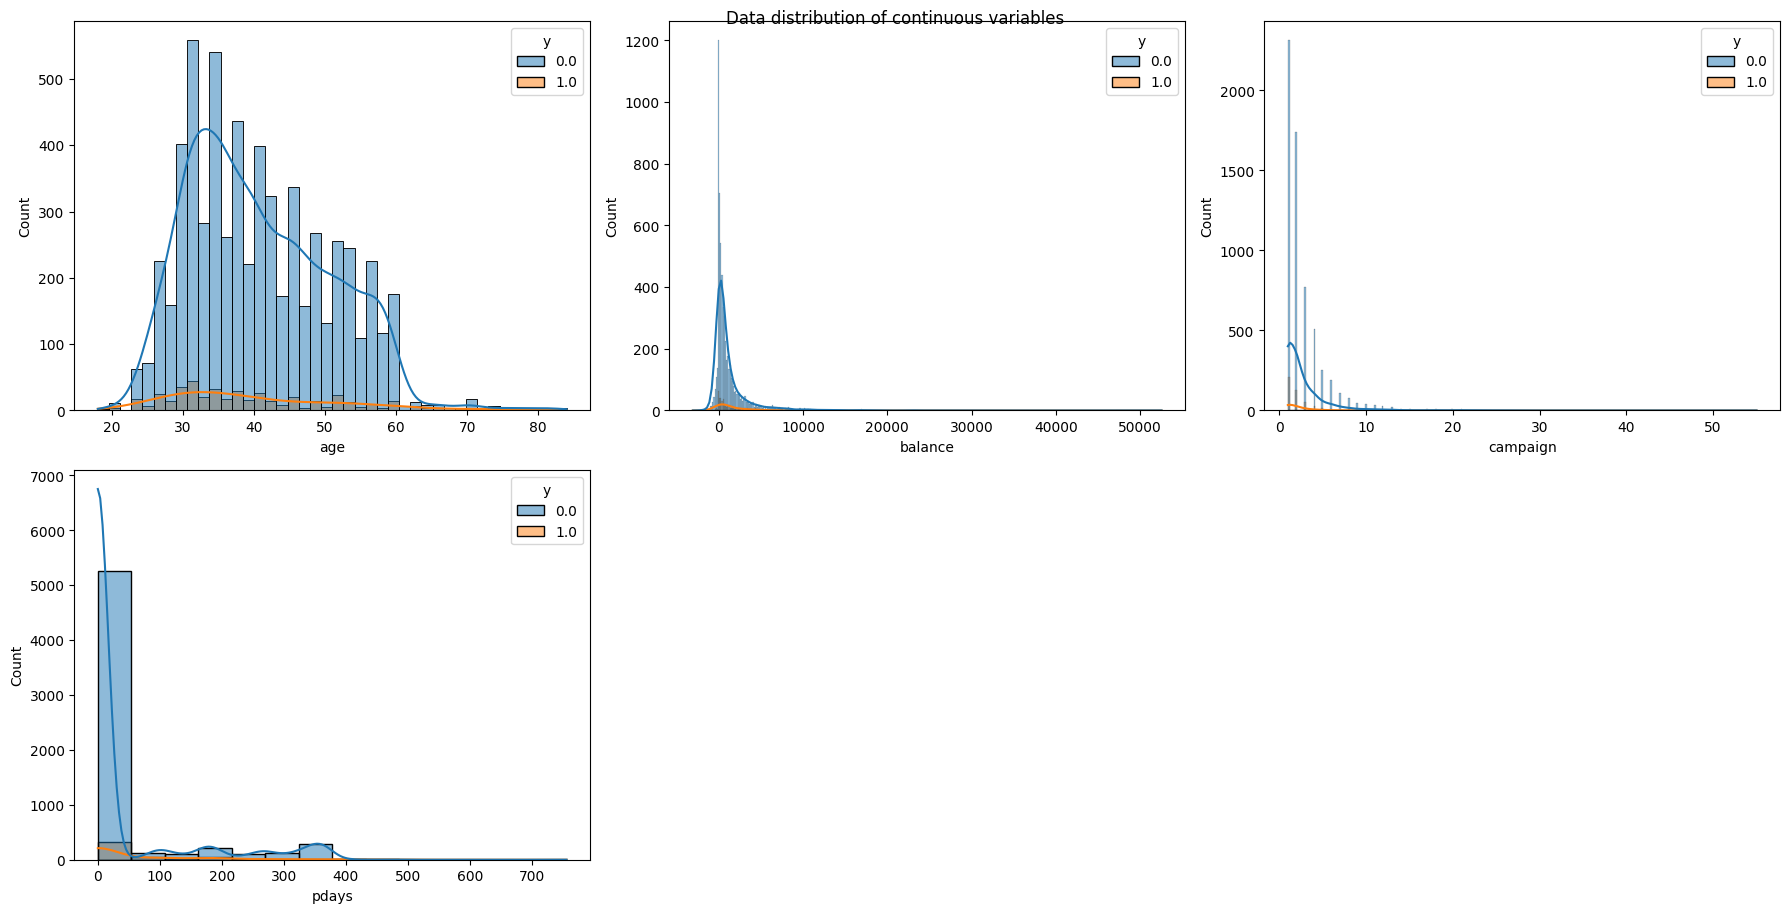

In [137]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(numeric_features):
    ax = plt.subplot(4,3, i+1)
    sns.histplot(data=df_val, x=col, ax=ax,color='blue',kde=True,hue='y')
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

## 7. Feature selection <a class="anchor" id="sec7"></a>

Le variabili più importanti sono:
1. balance
2. age
3. month
4. campaign
5. pdays
6. education
7. housing
8. loan
9. job (management)
14. previous
19. pdays_cat
21. default

In [138]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

rf = RandomForestClassifier(n_estimators=100)
rf.fit(df_val.drop(['y'],axis=1), df_val['y'])

RandomForestClassifier()

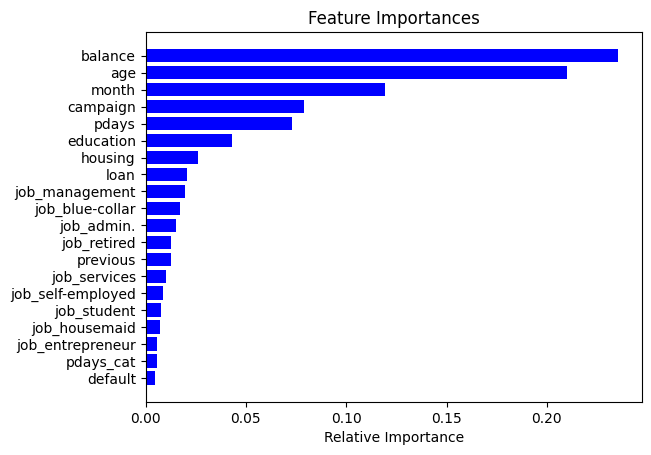

In [139]:
features = rf.feature_names_in_[:20]
importances = rf.feature_importances_[:20]
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## 8. Undersampling  <a class="anchor" id="sec7"></a>

In [140]:
df_train.y.value_counts()

y
0.0    24951
1.0     1853
Name: count, dtype: int64

In [141]:
df_train.y.value_counts(normalize=True)

y
0.0    0.930869
1.0    0.069131
Name: proportion, dtype: float64

In [158]:
no_select_idx = df_train[df_train.y==0].sample(frac=0.90, random_state=1).index.to_list()
no_select_idx[:5]

[32745, 7920, 24183, 6721, 24945]

In [159]:
df_train2 = df_train[~(df_train.index.isin(no_select_idx))]

In [160]:
df_train2.y.value_counts()

y
0.0    2495
1.0    1853
Name: count, dtype: int64

In [161]:
df_train2.y.value_counts(normalize=True)

y
0.0    0.573827
1.0    0.426173
Name: proportion, dtype: float64

In [146]:
# from imblearn.over_sampling import SMOTE
# resampler = SMOTE(random_state=123)
# X_train, y_train = resampler.fit_resample(df_train2.drop(['y'],axis=1),df_train2['y'])

In [147]:
y_train.values

array([0., 0., 0., ..., 0., 0., 0.])

In [148]:
# df_train2 = X_train.copy()
# df_train2['y'] = y_train.values

In [149]:
df_train2.y.value_counts()

y
0.0    3743
1.0    1853
Name: count, dtype: int64

In [150]:
df_train2.y.value_counts(normalize=True)

y
0.0    0.668871
1.0    0.331129
Name: proportion, dtype: float64

## Save preprocessed data

In [162]:
df_train2['type_set'] = 'train'
df_test['type_set'] = 'test'
df_val['type_set'] = 'val'

/tmp/ipykernel_9783/1901584586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train2['type_set'] = 'train'


In [163]:
from sklearn.utils import shuffle
df_train2 = shuffle(df_train2)
df_test = shuffle(df_test)
df_val = shuffle(df_val)
final_df = pd.concat([df_train2,df_test,df_val], ignore_index=True)

In [164]:
final_df.to_parquet('../data/processed/bank_data_prepro.parquet')